`63070501061 S.RAKNA`

> 10 points, 0.5 hr.

# Haar Cascade Classifier

Try your own image on the `Haar Cascade Classifier.ipynb` shown in class to detect faces.

In [1]:
# # Download the test image and utils files
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
#     -O test.jpg
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
#     -O haarcascade_frontalface_default.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
#     -O haarcascade_smile.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
#     -O haarcascade_eye.xml
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
#     -O common.py

In [2]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

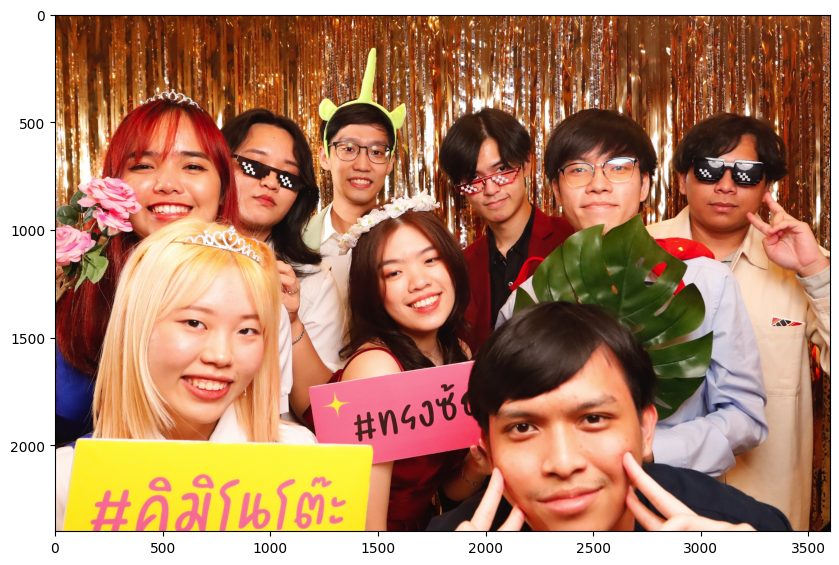

In [3]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))


### Face Detection

Text(0.5, 1.0, 'Face')

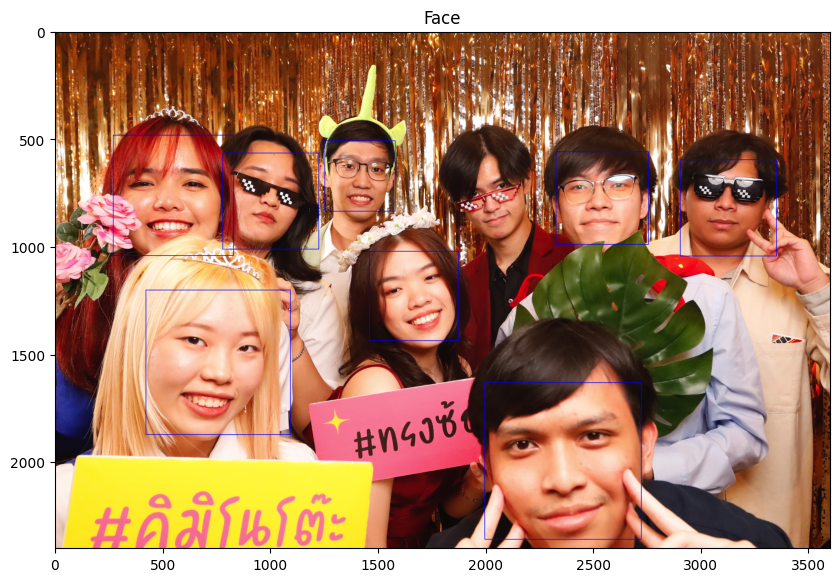

In [4]:
test_image = cv2.imread('test.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Face")


### Smile Detection

Text(0.5, 1.0, 'Smile')

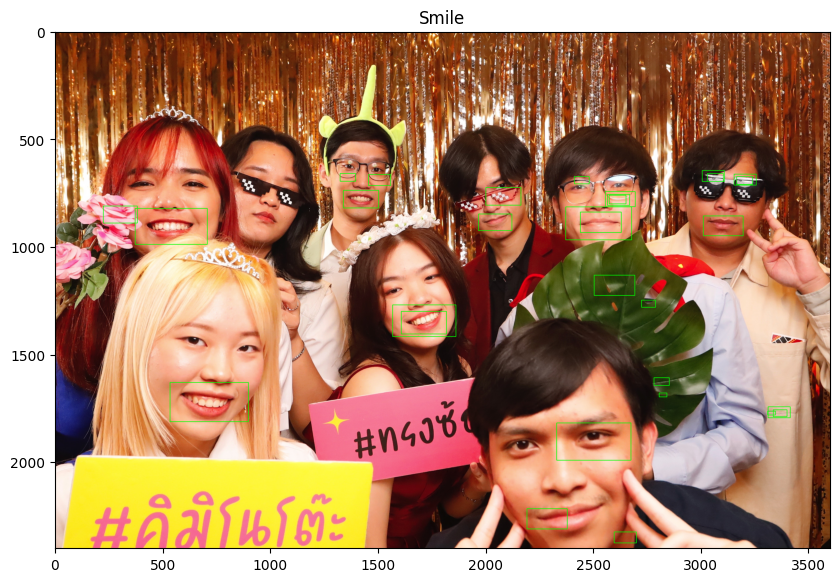

In [5]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x, y, w, h) in smiles:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Smile")

Text(0.5, 1.0, 'Smile')

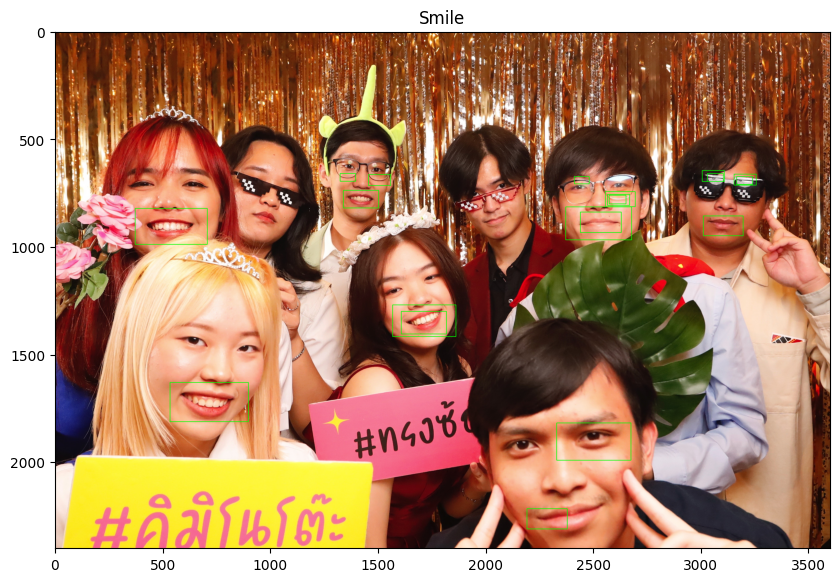

In [6]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x, y, w, h) in faces:
    for (x_s, y_s, w_s, h_s) in smiles:
        if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
            cv2.rectangle(test_image, (x_s, y_s),
                          (x_s+w_s, y_s+h_s), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Smile")

### Eye Detection

Text(0.5, 1.0, 'Eye')

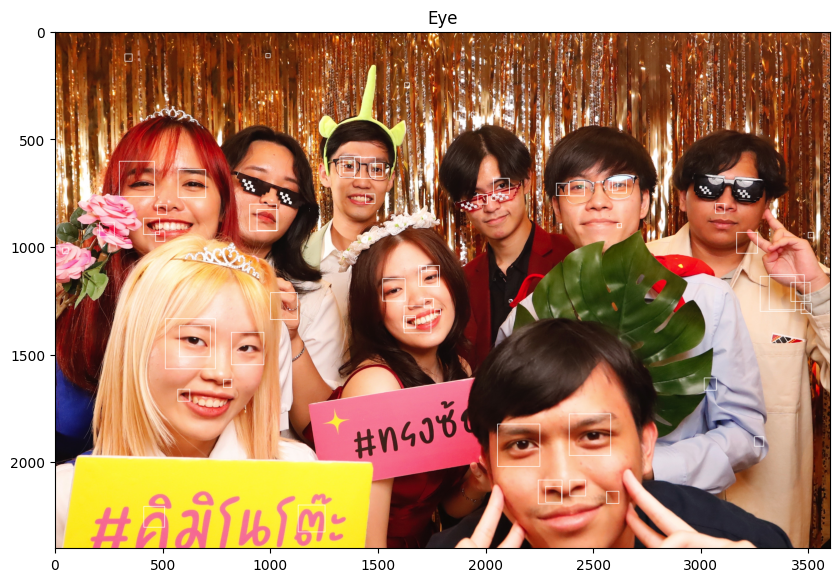

In [7]:
test_image = cv2.imread('test.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x, y, w, h) in eyes:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Eye")

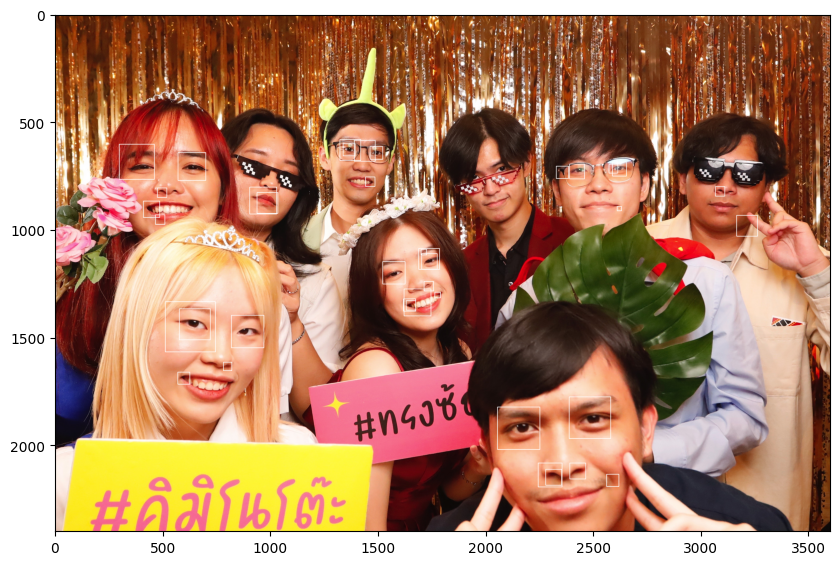

In [8]:
test_image = cv2.imread('test.jpg')
for (x, y, w, h) in faces:
    # cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
    for (x_s, y_s, w_s, h_s) in eyes:
        if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
            cv2.rectangle(test_image, (x_s, y_s),
                          (x_s+w_s, y_s+h_s), (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))


### Putting all together

Text(0.5, 1.0, 'Putting all together')

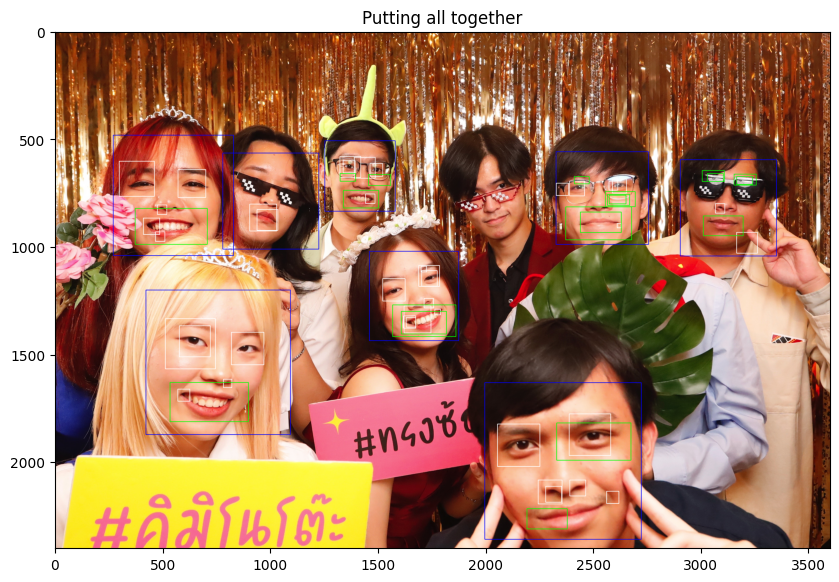

In [9]:
test_image = cv2.imread('test.jpg')
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    for (x_s, y_s, w_s, h_s) in eyes:
        if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
            cv2.rectangle(test_image, (x_s, y_s),
                          (x_s+w_s, y_s+h_s), (255, 255, 255), 2)
    for (x_s, y_s, w_s, h_s) in smiles:
        if ((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
            cv2.rectangle(test_image, (x_s, y_s),
                          (x_s+w_s, y_s+h_s), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Putting all together")